<div align="center">

# The Generalized Green's function Cluster Expansion (GGCE)

CCQ Polaron Meeting @ _Flatiron Institute_ | 16 May 2023

---

**[Matthew R. Carbone](https://matthewcarbone.github.io)** & Stepan Fomichev (equally contributing core developers)

Andrew J. Millis, Mona Berciu, David R. Reichman, and John Sous

---

Our manuscript is under review at the Journal of Open Source Software. [Check it out!](https://github.com/openjournals/joss-reviews/issues/5115) You can also find our preprint (citable DOI) on the [arXiv](https://arxiv.org/abs/2210.12260). Software is available open source on GitHub under the BSD 3-clause license: [github.com/matthewcarbone/GGCE](https://github.com/matthewcarbone/GGCE).

---

</div>

⭐️ **Purpose:** compute the Green's function of lattice polaron models

🎓 **What you will learn:** how to use the software to compute Green's functions. This tutorial will walk you through the basics of the API and how you can use our code in your own work.

🚀 **Quick reference**

* The GGCE software provides an efficient implementation of the GGCE method as outlined in our original paper: [Carbone, Reichman & Sous. PRB **104**, 035106 (2021)](https://doi.org/10.1103/PhysRevB.104.035106).
* Followup work on the Bond-Peierls model: [Carbone, Millis, Reichman & Sous. PRB **104**, L140307 (2021)](https://doi.org/10.1103/PhysRevB.104.L140307).
* The GGCE approach is the spiritual successor of the Momentum Average (MA) family of methods pioneered by [Mona Berciu](https://phas.ubc.ca/~berciu/). A small sampling:
    * [Berciu. PRL **97**, 036402 (2006)](https://doi.org/10.1103/PhysRevLett.97.036402): original paper (_k_-space formulation).
    * [Berciu & Fehske. PRB **82**, 085116 (2010)](https://doi.org/10.1103/PhysRevB.82.085116): an application of the MA method to the Edwards Fermion Boson model.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

`GGCE` is easily installable via Pip!

In [ ]:
!pip install ggce

## The Model API

A `Model` class is a simple abstraction for an electron-phonon coupling Hamiltonian of the form

$$ H = -t \sum_{\langle ij \rangle} c_i^\dagger c_j + \Omega \sum_i b_i^\dagger b_i + V,$$

where $V$ is an electron-phonon coupling operator which is quadratic in the fermionic operators and linear in phonon operators. Currently, GGCE supports the following well known Hamiltonians:

* Holstein
* Peierls
* Edwards Fermion Boson
* Bond-Peierls

The `Model` should always be initialized as such:

In [ ]:
from ggce import Model
model = Model.from_parameters(hopping=0.1)

One can set physical parameters such as

* the `hopping` strength $t$
* the `lattice_constant` (generally should just be 1)
* the `temperature` (GGCE is now able to compute finite-temperature spectra using the thermofield double approach)

You can always check out the docstring of any function/method by using the `?` notebook magic, e.g., `Model.from_parameters?`.

Once the model is created, one must "add" coupling terms using the `add_` method. Why this particular choice of abstraction? It allows you to add multiple phonon modes of different types, frequencies and coupling strengths.

In [ ]:
model.add_(
    "EdwardsFermionBoson",
    phonon_extent=3,
    phonon_number=9,
    phonon_frequency=1.25,
    dimensionless_coupling_strength=2.5
)

In [ ]:
model.visualize()

Hamiltonian parameters:
  Hopping (t)          = 1.00e-01
  Lattice constant (a) = 1.00e+00
  Temperature (T)      = 0.00e+00
  Max bosons per site  = None
  Absolute extent      = 3
Terms:
  Phonon type = 0 (M = 3; N = 9)
    EdwardsFermionBoson: 2.50 x ([1] [1] +) | 0 (1.25)
    EdwardsFermionBoson: 2.50 x ([-1] [-1] +) | 0 (1.25)
    EdwardsFermionBoson: 2.50 x ([1] [0] -) | 0 (1.25)
    EdwardsFermionBoson: 2.50 x ([-1] [0] -) | 0 (1.25)


In [ ]:
from ggce import System

In [ ]:
system = System(model)

2023-05-14 15:02:17 Predicted 166 generalized equations (agrees with analytic formula)
2023-05-14 15:02:17.230 ggce.engine.system:checkpoint:307 |WARNING   | root not provided to System - System checkpointing disabled
2023-05-14 15:02:18 Generated 771 total equations
2023-05-14 15:02:18.760 ggce.engine.system:checkpoint:307 |WARNING   | root not provided to System - System checkpointing disabled
2023-05-14 15:02:18 Closure checked and valid


In [ ]:
from ggce import DenseSolver

In [ ]:
solver = DenseSolver(system)

2023-05-14 15:02:44.295 ggce.executors.solvers:__init__:66 |WARNING   | root not provided to Solver - Solver checkpointing disabled


In [ ]:
k = np.array([0.0])
w = np.linspace(-3.0, -1.0, 100)
G = solver.greens_function(k, w, eta=0.005, pbar=True)
A = -G.imag / np.pi

100%|██████████| 100/100 [01:53<00:00,  1.13s/it]


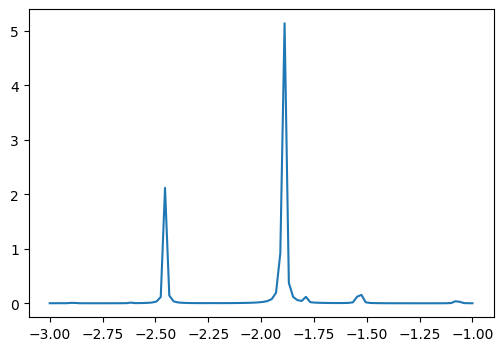

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(w, A.squeeze())
plt.show()